(220, 220, 3)


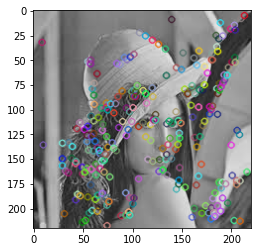

In [3]:
import numpy as np
import cv2 as cv
import cv2.xfeatures2d
from matplotlib import pyplot as plt
img = cv.imread('lenna.jpeg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

plt.imshow(img, cmap='gray')
print(img.shape)

(220, 220, 3)


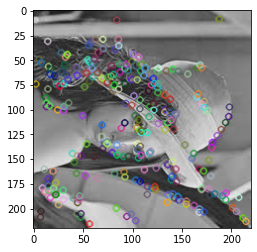

In [4]:
import numpy as np
import cv2 as cv
import cv2.xfeatures2d
from matplotlib import pyplot as plt

img = cv.imread('lenna.jpeg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

plt.imshow(img, cmap='gray')
print(img.shape)

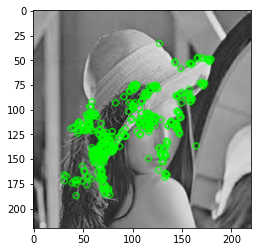

(220, 220)


In [31]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('lenna.jpeg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()
print(img.shape)

(11, 11, 3)
[[  0.   0.   2.  11.   4.   0.   0.   0.   5.   1.   2.  38.  64.   0.
    0.   0.  81.   5.   0.   6.  16.   0.   0.   0.  10.   0.   0.   0.
    0.   0.   0.   0.   0.   0.  33. 161.  29.   0.   0.   0.  33.  11.
   66. 161.  82.   6.   6.   3. 161.  29.   6.  38.  21.   2.   1.   4.
   42.   0.   0.   0.   0.   0.   0.   0.   4.   3.   7. 124. 161.  20.
    2.   5.  50.  16.  43.  97.  45.  42.  41.  29. 161.  12.   6.  10.
    5.  13.   9.  20.  44.   0.   0.   0.   0.   0.   0.   0.   1.   2.
    3.   5. 147.  49.   0.   0.  29.  24.  68.  40.  46.  11.   1.   2.
  161.  25.  13.   6.   1.   1.   0.   1.  24.   0.   0.   0.   0.   0.
    0.   0.]]


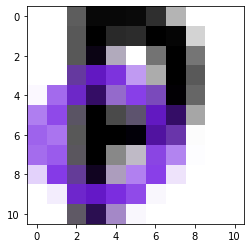

In [9]:
import numpy as np
import cv2 as cv
import cv2.xfeatures2d
from matplotlib import pyplot as plt

img = cv.imread('p.png')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

scale_percent = 5 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
gray = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)

sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img=cv.drawKeypoints(gray,kp,img)

plt.imshow(img, cmap='gray')
print(img.shape)
print(des)

(11, 11, 3)
[[  0.   0.   2.  11.   4.   0.   0.   0.   5.   1.   2.  38.  64.   0.
    0.   0.  81.   5.   0.   6.  16.   0.   0.   0.  10.   0.   0.   0.
    0.   0.   0.   0.   0.   0.  33. 161.  29.   0.   0.   0.  33.  11.
   66. 161.  82.   6.   6.   3. 161.  29.   6.  38.  21.   2.   1.   4.
   42.   0.   0.   0.   0.   0.   0.   0.   4.   3.   7. 124. 161.  20.
    2.   5.  50.  16.  43.  97.  45.  42.  41.  29. 161.  12.   6.  10.
    5.  13.   9.  20.  44.   0.   0.   0.   0.   0.   0.   0.   1.   2.
    3.   5. 147.  49.   0.   0.  29.  24.  68.  40.  46.  11.   1.   2.
  161.  25.  13.   6.   1.   1.   0.   1.  24.   0.   0.   0.   0.   0.
    0.   0.]]


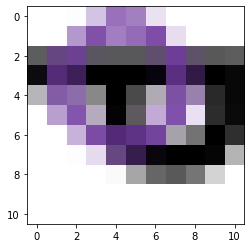

In [10]:
import numpy as np
import cv2 as cv
import cv2.xfeatures2d
from matplotlib import pyplot as plt

img = cv.imread('p.png')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

scale_percent = 5 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
gray = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img=cv.drawKeypoints(gray,kp,img)

plt.imshow(img, cmap='gray')
print(img.shape)
print(des)

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('p2.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('paulo.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

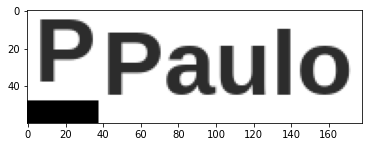

(<matplotlib.image.AxesImage at 0x7fee50db69e8>, None)

In [28]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

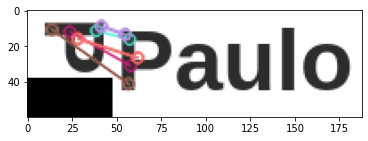

(67, 67, 3)


In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cv2.xfeatures2d
img1 = cv.imread('p2.png',cv.IMREAD_GRAYSCALE)   # queryImage
img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

img2 = cv.imread('paulo.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
print(img.shape)